In [ ]:
!nvidia-smi

Mon May  3 01:26:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#環境建置


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd /content/drive/My Drive/FakeNewsNet/aclimdb
!pip install transformers
!pip install nltk
import nltk
nltk.download("popular")

import pandas as pd
import numpy as np
subject="train"
path = "aclimdb"

Mounted at /content/drive
/content
/content/drive/My Drive/FakeNewsNet/aclimdb
     |████████████████████████████████| 2.1MB 19.0MB/s 
     |████████████████████████████████| 901kB 55.7MB/s 
     |████████████████████████████████| 3.3MB 53.0MB/s 
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data.

#顯示進度用函式

In [ ]:
import time
import math
def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return "%dm %ds" % (m, s)
def timeSince(since, percent):
  now = time.time()
  s = now - since
  if percent!=0:
    es = s / (percent)
    rs = es - s
    return "%s (- %s)" % (asMinutes(s), asMinutes(rs))
  else:
    return "%s (- INF)" % (asMinutes(s))

def progress(start,cur , total_len, loss):
  print("{} ({}%)\nloss = {}".format(
    timeSince(start,cur / total_len),
    (cur / total_len)* 100,
    loss
    )
  )

#預處理

In [ ]:
#每個句子分開來tokenize
#train.csv = train_pos concat train_neg concat train_unsup
import nltk
from transformers import XLNetTokenizerFast
subject="train"
data_pos = pd.read_csv(subject+"_pos.csv")
data_neg = pd.read_csv(subject+"_neg.csv")

#------------------------------------------------------------------------------- Preprocess -------------------------------------------------------------------

tokenizer = XLNetTokenizerFast.from_pretrained('xlnet-base-cased')


start = time.time()
total_rows = data_pos.shape[0]+data_neg.shape[0]
token_data = pd.DataFrame({"number":[],"content":[],"score":[],"length":[]})
i=0
for _,temp in data_pos.iterrows():
  if(i%50==0):
    progress(start,i,total_rows,"N/A")
  
  content_token = []
  if pd.notna(temp["content"]):
    content_sentences = nltk.sent_tokenize(temp["content"].lower())
    content_token = tokenizer(content_sentences,truncation=True,padding=True,max_length=50)["input_ids"]
  token_data = token_data.append({"number":temp["number"],"content":content_token,"score":temp["score"],"length":len(content_token)},ignore_index = True)
  i+=1

for _,temp in data_neg.iterrows():
  if(i%50==0):
    progress(start,i,total_rows,"N/A")
  
  content_token = []
  if pd.notna(temp["content"]):
    content_sentences = nltk.sent_tokenize(temp["content"].lower())
    content_token = tokenizer(content_sentences,truncation=True,padding=True,max_length=50)["input_ids"]
  token_data = token_data.append({"number":temp["number"],"content":content_token,"score":temp["score"],"length":len(content_token)},ignore_index = True)
  i+=1

print(token_data)
token_data.to_csv(subject+"_token_data_xlnet.csv",index=False)

Streaming output truncated to the last 5000 lines.
0m 0s (- 3m 49s) (0.27999999999999997%)
loss = N/A
0m 0s (- 3m 51s) (0.32%)
loss = N/A
0m 0s (- 3m 52s) (0.36%)
loss = N/A
0m 0s (- 3m 48s) (0.4%)
loss = N/A
0m 0s (- 3m 46s) (0.44%)
loss = N/A
0m 1s (- 3m 40s) (0.48%)
loss = N/A
0m 1s (- 3m 38s) (0.52%)
loss = N/A
0m 1s (- 3m 38s) (0.5599999999999999%)
loss = N/A
0m 1s (- 3m 37s) (0.6%)
loss = N/A
0m 1s (- 3m 37s) (0.64%)
loss = N/A
0m 1s (- 3m 35s) (0.6799999999999999%)
loss = N/A
0m 1s (- 3m 34s) (0.72%)
loss = N/A
0m 1s (- 3m 34s) (0.76%)
loss = N/A
0m 1s (- 3m 34s) (0.8%)
loss = N/A
0m 1s (- 3m 34s) (0.84%)
loss = N/A
0m 1s (- 3m 32s) (0.88%)
loss = N/A
0m 1s (- 3m 32s) (0.9199999999999999%)
loss = N/A
0m 2s (- 3m 31s) (0.96%)
loss = N/A
0m 2s (- 3m 30s) (1.0%)
loss = N/A
0m 2s (- 3m 29s) (1.04%)
loss = N/A
0m 2s (- 3m 28s) (1.08%)
loss = N/A
0m 2s (- 3m 27s) (1.1199999999999999%)
loss = N/A
0m 2s (- 3m 26s) (1.16%)
loss = N/A
0m 2s (- 3m 25s) (1.2%)
loss = N/A
0m 2s (- 3m 24s) (1

#模型

In [ ]:
#------------------------------------------------------------------------------- training shits -------------------------------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
from transformers import XLNetModel

GRU_HIDDEN_SIZE=256

# Bert-Embedding
class BiGRU(nn.Module):
  def __init__(self):
    super(BiGRU, self).__init__()
    self.embedding = XLNetModel.from_pretrained('xlnet-base-cased')
    self.gru = nn.GRU(
        input_size=768,
        hidden_size=GRU_HIDDEN_SIZE,
        dropout=0.3,
        num_layers=1,
        bidirectional=True,
    )

  def forward(self, tokens, masks=None):
    # XLNet
    # with torch.no_grad():
    embedded = self.embedding(tokens, attention_mask=masks)["last_hidden_state"]
    # print(embedded.shape)
    cls_vector = embedded[:,0,:]

    # GRU
    _, hidden = self.gru(cls_vector)

    return hidden[-1]

class Sentiment(nn.Module):
  def __init__(self):
    super(Sentiment,self).__init__()
    self.myEmbed = BiGRU()
    self.FC_1 = nn.Linear(GRU_HIDDEN_SIZE,1)

  
  def forward(self, content):
    count = 0
    embed = self.myEmbed(content)

    # print(newsEmbed)
    output = self.FC_1(embed.to(device))

    return output


#訓練用函式

In [ ]:
def train(train_model,X,y,optimizer,loss_func):
  optimizer.zero_grad()
  predict = train_model(torch.tensor(eval(X)).to(device))
  loss = loss_func(predict.view(1), torch.tensor([y]).to(device))
  # print("predict: {}\nans:     {}\n loss: {}".format(predict,torch.tensor([y]),loss))
  loss.backward()
  optimizer.step()
  return predict,loss.item()

#訓練用讀檔

In [ ]:
# 讀檔
from sklearn.model_selection import KFold
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
token_data_read_pd = pd.read_csv(subject+"_token_data_xlnet.csv")
token_data_read_pd = token_data_read_pd[token_data_read_pd["length"]<100]
token_data_read = token_data_read_pd.to_numpy()

In [ ]:
num=[0,0,0]
for i, temp in token_data_read_pd.iterrows():
  if temp["score"]>=7:
    num[0]+=1
  elif temp["score"]>=5:
    num[1]+=1
  else:
    num[2]+=1
num

[12497, 0, 12499]

In [ ]:
num=[0,0,0]
for i, temp in token_data_read_pd.iterrows():
  if temp["length"]<50:
    num[0]+=1
  elif temp["length"]<100:
    num[1]+=1
  else:
    num[2]+=1
num

[24922, 74, 0]

#訓練本體

In [ ]:
#產生random_index 並查看random_index前n筆資料有幾個pos幾個neg  ([pos數,neg數])

random_index = list(range(token_data_read.shape[0]))
np.random.shuffle(random_index)
f = open('./model/random.txt', 'w')
for i in random_index:
  f.write(str(i)+"\n")
f.close()

num=[0,0]
for i in random_index[:1000]:
  num[i>=12497]+=1
num

[489, 511]

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


0m 2s (- INF) (0.0%)
loss = 1.4651602783017568
0m 8s (- 331m 48s) (0.04445234708392603%)
loss = 2.483674072940393
0m 14s (- 274m 29s) (0.08890469416785206%)
loss = 2.8302656841059997
0m 21s (- 266m 36s) (0.13335704125177808%)
loss = 2.1793266722383438
0m 27s (- 256m 23s) (0.17780938833570412%)
loss = 2.475434860350364
0m 33s (- 248m 16s) (0.22226173541963018%)
loss = 2.4721203224130934
0m 38s (- 240m 18s) (0.26671408250355616%)
loss = 2.6883520422961
0m 45s (- 241m 27s) (0.3111664295874822%)
loss = 2.586151727290746
0m 51s (- 241m 50s) (0.35561877667140823%)
loss = 2.2064916814633233
0m 57s (- 239m 40s) (0.4000711237553343%)
loss = 2.1404987952347705
1m 3s (- 238m 34s) (0.44452347083926036%)
loss = 2.223456794831979
1m 9s (- 236m 51s) (0.4889758179231864%)
loss = 2.1071172502199467
1m 15s (- 235m 2s) (0.5334281650071123%)
loss = 2.202685167950571
1m 21s (- 234m 35s) (0.5778805120910384%)
loss = 2.2444973930782237
1m 27s (- 233m 35s) (0.6223328591749644%)
loss = 2.4160216609799257
1m 33

FileNotFoundError: ignored

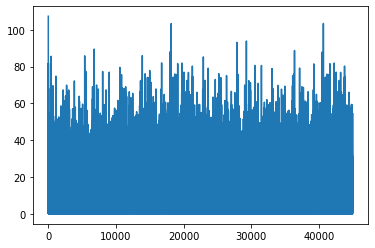

In [ ]:
import matplotlib.pyplot as plt

confusion_matrix = [[0,0],[0,0]]
kf = KFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(random_index):
  Sentiment_model = Sentiment().to(device)
  loss_func = nn.MSELoss()
  optimizer = optim.Adam(Sentiment_model.parameters(), lr=0.01)

  Sentiment_model.train()
  losses=[]
  EPOCH = 2
  cur = 0
  start = time.time()
  temp_loss = 0
  for epoch in range(EPOCH):
    for i in train_index:

      predict,loss = train(Sentiment_model,token_data_read[random_index[i]][1],float(token_data_read[random_index[i]][2]),optimizer,loss_func)
      losses.append(loss)
      temp_loss+=loss
      #紀錄模型
      if cur%1000==0:
        torch.save(Sentiment_model, './model/Sentiment_model_{}.pt'.format(cur))

      if cur%20==0:
        progress(start,cur,train_index.shape[0]*EPOCH,math.sqrt(temp_loss/50))
        # print("predict: {}  ans: {}".format(predict,token_data_read[i][2]))
        temp_loss=0
      cur+=1
  plt.plot(range(len(losses)),losses)
  plt.savefig('./model/loss.png')
  plt.show()

  break
print("end")

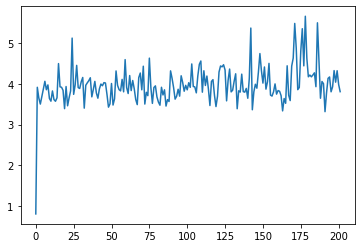

In [ ]:
from math import sqrt
plot_loss=[]
sum=0
batch_len=50
for i,loss in enumerate(losses):
  sum+=loss
  if i%batch_len==0:
    plot_loss.append(sqrt(sum/batch_len))
    sum=0
plt.plot(range(len(plot_loss)),plot_loss)
# plt.axvline(x=47,color='r')
# plt.axvline(x=57,color='r')
# plt.axvline(x=63,color='r')
# plt.ylim(0, 2)
plt.savefig('./model/haha.png')
plt.show()

#驗證用函式

In [ ]:
def evaluate(eval_model,X,y,loss_func):
  with torch.no_grad():
    predict = eval_model(torch.tensor(eval(X)).to(device))
    loss = loss_func(predict.view(1), torch.tensor([y]).to(device))
  return predict,loss.item()

In [ ]:
token_data_read_pd = pd.read_csv(subject+"_token_data_xlnet.csv")
token_data_read_pd = token_data_read_pd[token_data_read_pd["length"]<100]
token_data_read = token_data_read_pd.to_numpy() 
f = open('./model/random.txt', 'r')
random_index_read = [int(i) for i in list(f.read().split("\n")[:-1])]
f.close()

In [ ]:
train_index=random_index_read[:int(len(random_index_read)*0.9)]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
confusion_matrix = [[0,0],[0,0]]
eval_model = torch.load("./model/Sentiment_model_27000.pt")
eval_model.eval()
loss_func = nn.MSELoss()
EPOCH = 1
total_loss=0
cur_eval=0
upper_b=7
lower_b=4
start_eval = time.time()
for i in train_index:
  predict,loss = evaluate(eval_model,token_data_read[i][1],float(token_data_read[i][2]),loss_func)
  total_loss+=loss
  confusion_matrix[int(token_data_read[i][2])>=lower_b and int(token_data_read[i][2])<=upper_b][predict>=lower_b and predict<=upper_b]+=1


  if cur_eval%10==0:
    progress(start_eval,cur_eval,len(train_index),total_loss/(cur_eval+1))
    # print("predict: {}  ans: {}".format(predict,token_data_read[i][2]))
  cur_eval+=1

accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
print("average loss: {}".format(total_loss/len(train_index)))
print("confusion_matrix: {}".format(confusion_matrix))
print(" Accuracy: {}".format(accuracy))
print(" Precision: {}".format(precision))
print(" Recall: {}".format(recall))
print("F1: {}".format(2*precision*recall/(precision+recall)))


0m 0s (- INF) (0.0%)
loss = 26.14934730529785
0m 0s (- 25m 23s) (0.04445234708392603%)
loss = 17.529475038701836
0m 1s (- 19m 2s) (0.08890469416785206%)
loss = 17.898215293884277
0m 1s (- 16m 40s) (0.13335704125177808%)
loss = 15.923491939421623
0m 1s (- 15m 58s) (0.17780938833570412%)
loss = 15.524020410165555
0m 2s (- 15m 52s) (0.22226173541963018%)
loss = 15.692075397454056
0m 2s (- 14m 57s) (0.26671408250355616%)
loss = 15.076266871124018
0m 3s (- 16m 40s) (0.3111664295874822%)
loss = 14.384247569970682
0m 3s (- 15m 55s) (0.35561877667140823%)
loss = 14.347384730974833
0m 3s (- 15m 22s) (0.4000711237553343%)
loss = 14.502939158743555
0m 4s (- 15m 11s) (0.44452347083926036%)
loss = 14.449921180706212
0m 4s (- 14m 53s) (0.4889758179231864%)
loss = 14.408506306442055
0m 4s (- 14m 36s) (0.5334281650071123%)
loss = 14.150419709111048
0m 4s (- 14m 5s) (0.5778805120910384%)
loss = 13.805086748290607
0m 5s (- 14m 15s) (0.6223328591749644%)
loss = 13.525499021753351
0m 5s (- 14m 12s) (0.666

In [ ]:
test_index=random_index_read[int(len(random_index_read)*0.9):]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
confusion_matrix = [[0,0],[0,0]]
eval_model = torch.load("./model/Sentiment_model_27000.pt")
eval_model.eval()
loss_func = nn.MSELoss()
EPOCH = 1
total_loss=0
cur_eval=0
upper_b=7
lower_b=4
start_eval = time.time()
for i in test_index:
  predict,loss = evaluate(eval_model,token_data_read[i][1],float(token_data_read[i][2]),loss_func)
  total_loss+=loss
  confusion_matrix[int(token_data_read[i][2])>=lower_b and int(token_data_read[i][2])<=upper_b][predict>=lower_b and predict<=upper_b]+=1


  if cur_eval%10==0:
    progress(start_eval,cur_eval,len(test_index),total_loss/(cur_eval+1))
    # print("predict: {}  ans: {}".format(predict,token_data_read[i][2]))
  cur_eval+=1

accuracy = (confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
precision = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[0][1])
recall = confusion_matrix[1][1]/(confusion_matrix[1][1]+confusion_matrix[1][0])
print("average loss: {}".format(total_loss/len(test_index)))
print("confusion_matrix: {}".format(confusion_matrix))
print(" Accuracy: {}".format(accuracy))
print(" Precision: {}".format(precision))
print(" Recall: {}".format(recall))
print("F1: {}".format(2*precision*recall/(precision+recall)))


0m 0s (- INF) (0.0%)
loss = 15.103769302368164
0m 0s (- 2m 21s) (0.4%)
loss = 7.2153953313827515
0m 1s (- 2m 17s) (0.8%)
loss = 9.398193546703883
0m 1s (- 2m 10s) (1.2%)
loss = 10.782707314337454
0m 1s (- 1m 59s) (1.6%)
loss = 11.895402844359236
0m 2s (- 1m 51s) (2.0%)
loss = 12.062831041859646
0m 2s (- 1m 44s) (2.4%)
loss = 12.009935994617274
0m 3s (- 1m 45s) (2.8000000000000003%)
loss = 11.529560727132878
0m 3s (- 1m 43s) (3.2%)
loss = 11.69529585926621
0m 3s (- 1m 41s) (3.5999999999999996%)
loss = 11.927503686684828
0m 4s (- 1m 36s) (4.0%)
loss = 12.282946159343908
0m 4s (- 1m 38s) (4.3999999999999995%)
loss = 12.370822372737232
0m 4s (- 1m 36s) (4.8%)
loss = 12.193984630679296
0m 5s (- 1m 37s) (5.2%)
loss = 12.300912828845831
0m 5s (- 1m 36s) (5.6000000000000005%)
loss = 12.069010195157206
0m 6s (- 1m 35s) (6.0%)
loss = 12.267884705240363
0m 6s (- 1m 35s) (6.4%)
loss = 12.34916969782077
0m 6s (- 1m 33s) (6.800000000000001%)
loss = 12.582829897166693
0m 7s (- 1m 32s) (7.199999999999